# Setup Gym with Atari games on Kaggle
Welcome to my notebook on Kaggle. I did record my notes so it might help others in their journey to understand Neural Networks by examples (in this case Reinforcement Learning with Gym for Atari games from OpenAI). 

This notebook is to show how to set-up gym including the gym[atari] environments in Kaggle so you can get to work and try to beat all those Atari 2600 games like Pong, Pacman, Spaceinvaders, etc

If you are interested in Reinforcement Learning you might be interested in some of my other notebooks:  
https://www.kaggle.com/charel/learn-by-example-reinforcement-learning-with-gym  
If you are new to Neural Networks you might want to have a look at my notebooks below:    
https://www.kaggle.com/charel/learn-neural-networks-by-example-mnist-digits  
https://www.kaggle.com/charel/learn-by-example-rnn-lstm-gru-time-series  

# Gym  
In 2014 Google DeepMind published a paper titled "Playing Atari with Deep Reinforcement Learning" that can play Atari 2600 games at expert human levels. This was the first breakthrough in applying deep neural networks for reinforcement learning.
![alt text](https://cdn-images-1.medium.com/max/800/1*3ZgGbUpEyAZb9POWijRq4Q.png)


Gym is released by Open AI in 2016 (http://gym.openai.com/docs/). It is a toolkit for developing and comparing reinforcement learning algorithms.
<img src="https://i.imgur.com/ria9HOm.jpg%20" width=800>

Source: [OpenAI](https://openai.com/)

In 2018 Gym-retro was released as its successor: https://blog.openai.com/gym-retro/

There are many many games made available. and you need to install the gym[atari] environment to make the Atari games available. In Kaggle you have to enable the Internet-beta feature available to make it internet connected (see to the left of the screen in the settings) and to be able to install the required packages
![alt text](https://cdn-images-1.medium.com/max/800/1*vUMIoHkl-PuIjbTqbtn8dA.png)



In [1]:
!pip install gym 
!pip install 'gym[box2d]'
!pip install atari_py

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 450kB 21.0MB/s 
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 2.6MB 10.7MB/s 
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import gym
from gym import wrappers
from gym import envs
import numpy as np 
#import datetime
import matplotlib.pyplot as plt
%matplotlib inline
#import time
import os

## Show game screens
Let's show some game screens of these iconic games

## Breakout

![alt text](http://www.atarimania.com/2600/boxes/hi_res/breakout_color_cart_4.jpg)


Source: [Atari mania](http://www.atarimania.com/game-atari-2600-vcs-breakout_18135.html)


Observation space: Box(210, 160, 3)
Action space: Discrete(4)


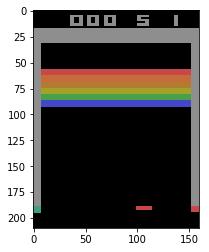

In [3]:
env = gym.make("BreakoutNoFrameskip-v4")
plt.imshow(env.render('rgb_array'))
plt.grid(False)
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)


## Pacman

![alt text](http://www.atarimania.com/2600/boxes/hi_res/ms_pac_man_silver_1987_cart_7.jpg)


Source: [Atari mania](http://www.atarimania.com/game-atari-2600-vcs-ms-pac-man_7391.html)


Observation space: Box(210, 160, 3)
Action space: Discrete(9)


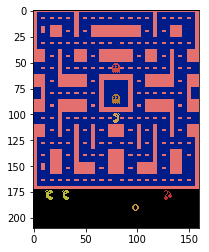

In [4]:
env = gym.make("MsPacmanNoFrameskip-v4")
plt.imshow(env.render('rgb_array'))
plt.grid(False)
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

## Spaceinvaders

![alt text](http://www.atarimania.com/2600/boxes/hi_res/space_invaders_silver_1986_cart_2.jpg)


Source: [Atari mania](http://www.atarimania.com/game-atari-2600-vcs-space-invaders_8102.html/)


Observation space: Box(210, 160, 3)
Action space: Discrete(6)


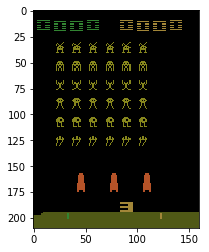

In [5]:
env = gym.make("SpaceInvadersNoFrameskip-v4")
plt.imshow(env.render('rgb_array'))
plt.grid(False)
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

## Capture a video
Below the code to set-up a virtual monitor and capture a movie

In [6]:
# Set-up the virtual display environment
!apt-get update
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
!apt-get install ffmpeg -y

Get:1 http://security.debian.org/debian-security stretch/updates InRelease [94.3 kB]
Ign:2 http://deb.debian.org/debian stretch InRelease
Get:3 http://deb.debian.org/debian stretch-updates InRelease [91.0 kB]
Err:1 http://security.debian.org/debian-security stretch/updates InRelease
  Couldn't create temporary file /tmp/apt.conf.IDcOz6 for passing config to apt-key
Err:3 http://deb.debian.org/debian stretch-updates InRelease
  Couldn't create temporary file /tmp/apt.conf.CdJAv7 for passing config to apt-key
Get:4 http://deb.debian.org/debian stretch Release [118 kB]
Get:5 http://deb.debian.org/debian stretch Release.gpg [2434 B]
Err:5 http://deb.debian.org/debian stretch Release.gpg
  Couldn't create temporary file /tmp/apt.conf.OOH9V9 for passing config to apt-key
Ign:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Get:8 https://developer.down

In [7]:
# Start the virtual monitor
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [8]:
# play a random game and create video
env = gym.make("MsPacmanNoFrameskip-v4")
monitor_dir = os.getcwd()

#Setup a wrapper to be able to record a video of the game
record_video = True
should_record = lambda i: record_video
env = wrappers.Monitor(env, monitor_dir, video_callable=should_record, force=True)

#Play a random game
state = env.reset()
done = False
while not done:
  action = env.action_space.sample() #random action, replace by the prediction of the model
  state, reward, done, _ = env.step(action)

record_video = False
env.close() 

# download videos
#from google.colab import files
#import glob
os.chdir(monitor_dir) # change directory to get the files
!pwd #show file path
!ls # show directory content



/kaggle/working
__notebook__.ipynb
__output__.json
openaigym.episode_batch.0.19.stats.json
openaigym.manifest.0.19.manifest.json
openaigym.video.0.19.video000000.meta.json
openaigym.video.0.19.video000000.mp4


## Play video

The MP4 file is already generated and is part of the output files. Go to your navigation bar at the top/left of the screen to the tab Output and click on the .mp4 file. 


## Reinforcement learning training
After the first publication of DQN many deeplearning Reinforcement Learning algorithms have been invented/tried, Some main ones in chronological order: DQN, Double DQN, Duelling DQN, Deep Deterministic Policy Gradient, Continuous DQN (CDQN or NAF) , A2C/A3C, Proximal Policy Optimization Algorithms, ARS, etc, etc. 

For the actual (long, millions of game screens) training I would like to recommend [colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) solutions, since Kaggle is owned by Alphabet I presume they don't mind I refer to Google colab solutions. Will keep posting some links over here:

Bipedal walker  with Augmented Random Search: 
* Colab: https://colab.research.google.com/drive/1NxvslFQ6RDLBirlOYH4b77zabSW_x5DM   
* Video: 	https://www.youtube.com/watch?v=NJBgeOF5CnM  

Ms Pacman with Proximal Policy Optimization:   
* Colab: https://colab.research.google.com/drive/1aSoqbO_wysvciYfDv4hJbL6ZS7lXFnMN   
* video after training 20 Million game screens:  https://youtu.be/um2XX5bktMA  )  


Hoped you liked my notebook (upvote top right), my way to conribute back to this fantastic Kaggle platform and community.